In [42]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import util

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [24]:
df = util.load_train_data()

In [25]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [26]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [28]:
filtered_df = df[["rideDistance", "swimDistance", "walkDistance", "winPlacePerc"]]
filtered_df

,rideDistance,swimDistance,walkDistance,winPlacePerc
0,0.0000,0.000,244.80,0.4444
1,0.0045,11.040,1434.00,0.6400
2,0.0000,0.000,161.80,0.7755
3,0.0000,0.000,202.70,0.1667
4,0.0000,0.000,49.75,0.1875
...,...,...,...,...
4446961,1292.0000,0.000,1019.00,0.1786
4446962,0.0000,0.000,81.70,0.2935
4446963,0.0000,2.184,788.70,0.4815
4446964,0.0000,0.000,2748.00,0.8000


<IPython.core.display.Javascript object>


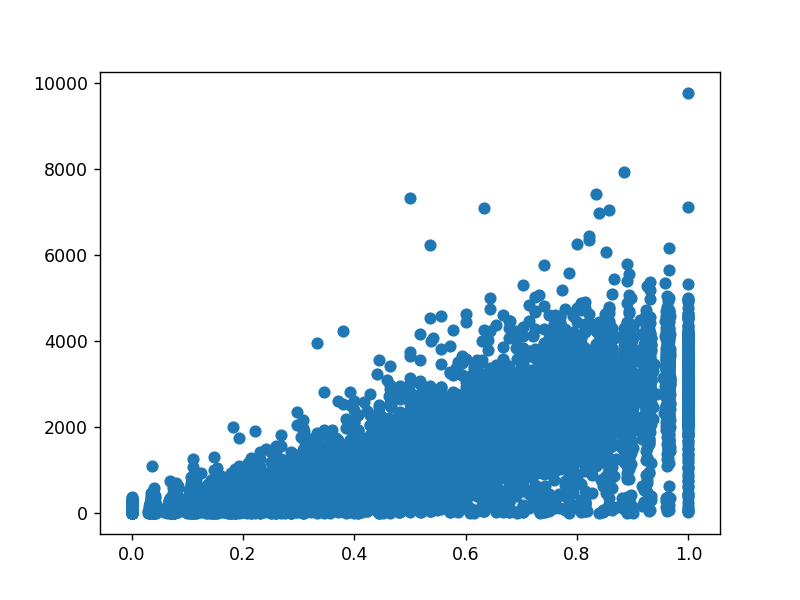

In [70]:
smaller_df = df[df.matchType == "squad-fpp"].sample(10000)

x = smaller_df.winPlacePerc
y = smaller_df.walkDistance

plt.figure()
plt.scatter(x,y)
plt.show()

In [71]:
smaller_df.matchType.value_counts()

squad-fpp    10000
Name: matchType, dtype: int64

In [62]:
thing = (smaller_df.winPlacePerc*100).astype(int)
thing

1938326     72
414540      92
486726     100
1812680     52
2145777     80
          ... 
1210041     90
2066875     64
455524      17
1360819     61
340879       0
Name: winPlacePerc, Length: 10000, dtype: int64

<IPython.core.display.Javascript object>


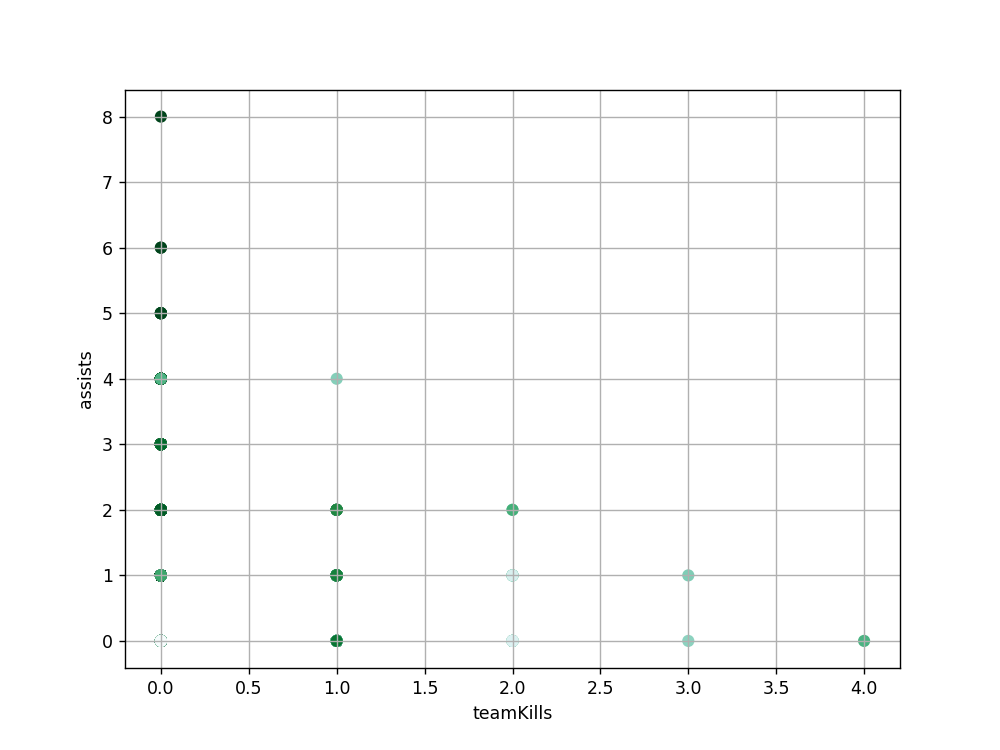

interactive(children=(Dropdown(description='y_name', options=('DBNOs', 'assists', 'boosts', 'damageDealt', 'he…

<function __main__.plot_against_win(y_name, x_name)>

In [72]:
def plot_against_win(y_name, x_name):
    axes.clear()
    y = smaller_df[y_name]
    x = smaller_df[x_name]
    #color_axis = (smaller_df["winPlacePerc"]*100).astype(int)
    color_axis = smaller_df["winPlacePerc"]
    
    axes.set_ylabel(y_name)
    axes.set_xlabel(x_name)
    axes.scatter(x,y, c=color_axis, cmap='BuGn')
    axes.grid(axis="both")

usable_columns_df = df[df.columns.difference(['Id', 'groupId', 'matchId'])]


fig, axes = plt.subplots(figsize=(8,6))
interact(plot_against_win, y_name=list(usable_columns_df), x_name=list(usable_columns_df))
#w = interactive(plot_against_win, y_name=list(df.columns))
#w

In [49]:
smaller_df[(smaller_df.weaponsAcquired == 0) & (smaller_df.winPlacePerc > .8)].iloc[2]

Id                 f54229cf10968b
groupId            a6e69074d52186
matchId            8a3824146370a2
assists                         0
boosts                          0
damageDealt                     0
DBNOs                           0
headshotKills                   0
heals                           0
killPlace                      38
killPoints                   1073
kills                           0
killStreaks                     0
longestKill                     0
matchDuration                1471
matchType               squad-fpp
maxPlace                       30
numGroups                      29
rankPoints                     -1
revives                         0
rideDistance                    0
roadKills                       0
swimDistance                    0
teamKills                       0
vehicleDestroys                 0
walkDistance                10.44
weaponsAcquired                 0
winPoints                    1393
winPlacePerc               0.9655
Name: 781, dty

In [51]:
smaller_df[["winPlacePerc", "killPlace", "killPoints", "heals", "damageDealt", "walkDistance"]].describe()

,winPlacePerc,killPlace,killPoints,heals,damageDealt,walkDistance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.473398,48.376000,492.155000,1.376000,126.818113,1139.339793
std,0.309387,27.539845,618.044315,2.681383,167.517810,1157.193767
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206200,25.000000,0.000000,0.000000,0.000000,151.300000
50%,0.451600,48.000000,0.000000,0.000000,77.800000,686.050000
75%,0.756250,72.000000,1142.000000,2.000000,175.250000,1922.500000
max,1.000000,99.000000,1850.000000,25.000000,1563.000000,6755.000000


<IPython.core.display.Javascript object>


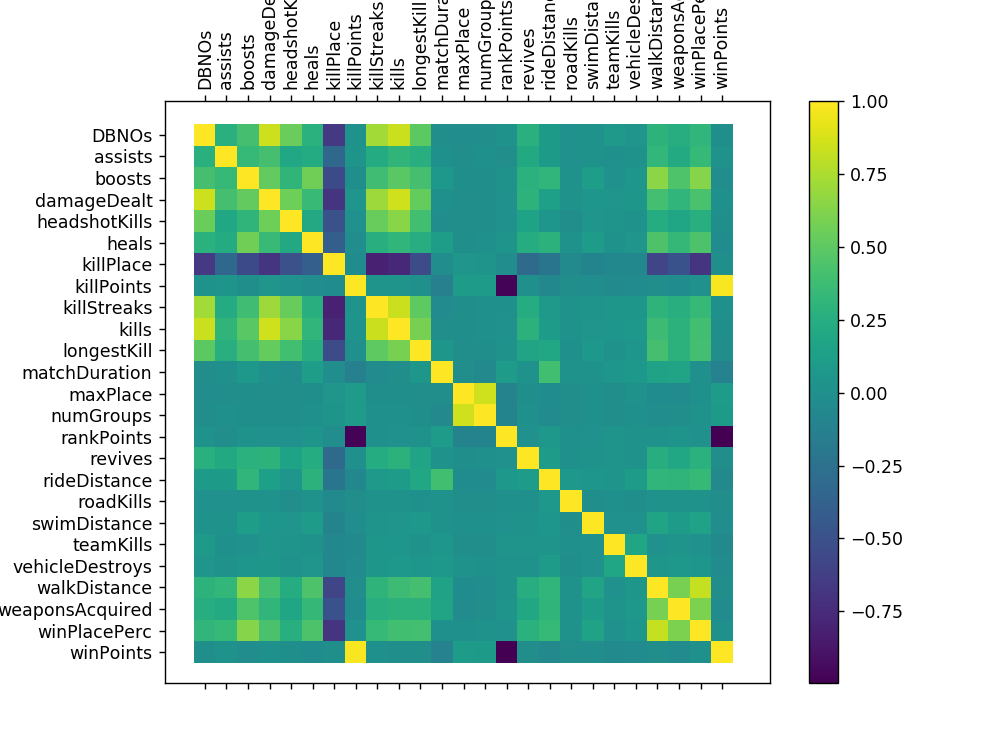

In [80]:
cdf = smaller_df[smaller_df.columns.difference(['Id', "groupId", "matchId", "matchType"])]

f = plt.figure(figsize=(8, 6))
plt.matshow(cdf.corr(), fignum=f.number)
plt.xticks(range(cdf.shape[1]), cdf.columns, fontsize=10, rotation=90)
plt.yticks(range(cdf.shape[1]), cdf.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

# Observations

Probably want to filter by gamemode